

#        OPTIMIZING MEDICATION THROUGH PREDICTIVE ANALYSIS



##  -----------------------------------------------------------------------------------------------------------

## Name : NAFLA K V
## Organization : Entri Elevate
## Date : 18/01/2025

##  -----------------------------------------------------------------------------------------------------------

#    Overview of Problem Statement

In today's rapidly advancing medical field, accurate and efficient treatment is paramount to ensuring better patient outcomes. The healthcare sector faces an ongoing challenge of prescribing the right medication to patients based on their health conditions. This challenge is compounded by the vast diversity in patient profiles, medical histories, and health parameters.

This project aims to address this critical challenge by utilizing machine learning to predict medication levels based on patient information. The dataset used includes various patient-specific features such as age, health conditions, diagnostic test results, and other clinical parameters. The target variable, medication, represents the different types or levels of medication prescribed. By building a robust predictive model, this project seeks to automate and enhance the accuracy of medication recommendations.

Such a solution holds significant importance in modern healthcare. It not only helps medical professionals make informed decisions but also reduces human error, optimizes treatment plans, and ensures better utilization of healthcare resources. Ultimately, this initiative aligns with the broader goal of leveraging technology to improve patient care and well-being.




#  Objective

To design a machine learning model that helps predict the required medication type for patients by analyzing their health conditions, medical test results, and other relevant data.

# Data Description 

### SOURCE :
Dataset can be downloaded from the link: https://data.world/ninami/healthcare-dataset/workspace/file?filename=updated_healthcare_dataset.xlsx

### Features :
    1.encounter_id 
    2.patient_id
    3.Name 
    4.Age 
    5.Gender
    6.Blood_Type
    7.Medical_Condition
    8.doctor_id
    9.Doctor 
    10.hospital_id 
    11.Hospital
    12.insurance_provider_id 
    13.Insurance_Provider
    14.Billing_Amount
    15.Room_Number 
    16.Admission_Type
    17.Date_of_Admission
    18.Discharge_Date
    19.Medication
    20.Test_Result
    21.Length_Of_Stay


# Data collection

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
# load dataset
data = pd.read_csv(r"C:\Users\nafla\OneDrive\Desktop\ML\final project\updated_healthcare_dataset.csv.csv")
data

,encounter_id,patient_id,Name,Age,Gender,Blood_Type,Medical_Condition,doctor_id,Doctor,hospital_id,...,insurance_provider_id,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Date_of_Admission,Discharge_Date,Medication,Test_Results,Length_Of_Stay
0,1,48559735,Tiffany Ramirez,81,Female,O-,Diabetes,24379,Patrick Parker,8130,...,17536,Medicare,37490.983360,146,Elective,2022-11-17,2022-12-01,Aspirin,Inconclusive,14
1,2,68988993,Ruben Burns,35,Male,O+,Asthma,54845,Diane Jackson,7856,...,97562,UnitedHealthcare,47304.064850,404,Emergency,2023-06-01,2023-06-15,Lipitor,Normal,14
2,3,57429465,Chad Byrd,61,Male,B-,Obesity,88087,Paul Baker,4494,...,36710,Medicare,36874.897000,292,Emergency,2019-01-09,2019-02-08,Lipitor,Normal,30
3,4,44487379,Antonio Frederick,49,Male,B-,Asthma,22426,Brian Chandler,8117,...,70210,Medicare,23303.322090,480,Urgent,2020-05-02,2020-05-03,Penicillin,Abnormal,1
4,5,57789449,Mrs. Brandy Flowers,51,Male,O-,Arthritis,84765,Dustin Griffin,7259,...,92038,UnitedHealthcare,18086.344180,477,Urgent,2021-07-09,2021-08-02,Paracetamol,Normal,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,92106285,James Hood,83,Male,A+,Obesity,29623,Samuel Moody,3914,...,11695,UnitedHealthcare,39606.840080,110,Elective,2022-07-29,2022-08-02,Ibuprofen,Abnormal,4
9996,9997,37699698,Stephanie Evans,47,Female,AB+,Arthritis,21531,Christopher Yates,2035,...,24850,Blue Cross,5995.717488,244,Emergency,2022-01-06,2022-01-29,Ibuprofen,Normal,23
9997,9998,69001727,Christopher Martinez,54,Male,B-,Arthritis,86553,Robert Nicholson,6375,...,10614,Blue Cross,49559.202900,312,Elective,2022-07-01,2022-07-15,Ibuprofen,Normal,14
9998,9999,55907201,Amanda Duke,84,Male,A+,Arthritis,85611,Jamie Lewis,8854,...,51516,UnitedHealthcare,25236.344760,420,Urgent,2020-02-06,2020-02-26,Penicillin,Normal,20


# Data Preprocessing 

In [3]:
data.shape

(10000, 21)

 The dataset contains 10000 rows and 21 columns.

In [4]:
data.columns

Index(['encounter_id', 'patient_id', 'Name', 'Age', 'Gender', 'Blood_Type',
       'Medical_Condition', 'doctor_id', 'Doctor', 'hospital_id', 'Hospital',
       'insurance_provider_id', 'Insurance_Provider', 'Billing_Amount',
       'Room_Number', 'Admission_Type', 'Date_of_Admission', 'Discharge_Date',
       'Medication', 'Test_Results', 'Length_Of_Stay'],
      dtype='object')

In [5]:
data.head()

,encounter_id,patient_id,Name,Age,Gender,Blood_Type,Medical_Condition,doctor_id,Doctor,hospital_id,...,insurance_provider_id,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Date_of_Admission,Discharge_Date,Medication,Test_Results,Length_Of_Stay
0,1,48559735,Tiffany Ramirez,81,Female,O-,Diabetes,24379,Patrick Parker,8130,...,17536,Medicare,37490.98336,146,Elective,2022-11-17,2022-12-01,Aspirin,Inconclusive,14
1,2,68988993,Ruben Burns,35,Male,O+,Asthma,54845,Diane Jackson,7856,...,97562,UnitedHealthcare,47304.06485,404,Emergency,2023-06-01,2023-06-15,Lipitor,Normal,14
2,3,57429465,Chad Byrd,61,Male,B-,Obesity,88087,Paul Baker,4494,...,36710,Medicare,36874.89700,292,Emergency,2019-01-09,2019-02-08,Lipitor,Normal,30
3,4,44487379,Antonio Frederick,49,Male,B-,Asthma,22426,Brian Chandler,8117,...,70210,Medicare,23303.32209,480,Urgent,2020-05-02,2020-05-03,Penicillin,Abnormal,1
4,5,57789449,Mrs. Brandy Flowers,51,Male,O-,Arthritis,84765,Dustin Griffin,7259,...,92038,UnitedHealthcare,18086.34418,477,Urgent,2021-07-09,2021-08-02,Paracetamol,Normal,24


In [6]:
data.tail()

,encounter_id,patient_id,Name,Age,Gender,Blood_Type,Medical_Condition,doctor_id,Doctor,hospital_id,...,insurance_provider_id,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Date_of_Admission,Discharge_Date,Medication,Test_Results,Length_Of_Stay
9995,9996,92106285,James Hood,83,Male,A+,Obesity,29623,Samuel Moody,3914,...,11695,UnitedHealthcare,39606.840080,110,Elective,2022-07-29,2022-08-02,Ibuprofen,Abnormal,4
9996,9997,37699698,Stephanie Evans,47,Female,AB+,Arthritis,21531,Christopher Yates,2035,...,24850,Blue Cross,5995.717488,244,Emergency,2022-01-06,2022-01-29,Ibuprofen,Normal,23
9997,9998,69001727,Christopher Martinez,54,Male,B-,Arthritis,86553,Robert Nicholson,6375,...,10614,Blue Cross,49559.202900,312,Elective,2022-07-01,2022-07-15,Ibuprofen,Normal,14
9998,9999,55907201,Amanda Duke,84,Male,A+,Arthritis,85611,Jamie Lewis,8854,...,51516,UnitedHealthcare,25236.344760,420,Urgent,2020-02-06,2020-02-26,Penicillin,Normal,20
9999,10000,12309123,Eric King,20,Male,B-,Arthritis,89049,Tasha Avila,6731,...,67783,Aetna,37223.965860,290,Emergency,2023-03-22,2023-04-15,Penicillin,Abnormal,24


In [7]:
# datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   encounter_id           10000 non-null  int64  
 1   patient_id             10000 non-null  int64  
 2   Name                   10000 non-null  object 
 3   Age                    10000 non-null  int64  
 4   Gender                 10000 non-null  object 
 5   Blood_Type             10000 non-null  object 
 6   Medical_Condition      10000 non-null  object 
 7   doctor_id              10000 non-null  int64  
 8   Doctor                 10000 non-null  object 
 9   hospital_id            10000 non-null  int64  
 10  Hospital               10000 non-null  object 
 11  insurance_provider_id  10000 non-null  int64  
 12  Insurance_Provider     10000 non-null  object 
 13  Billing_Amount         10000 non-null  float64
 14  Room_Number            10000 non-null  int64  
 15  Adm

## Observation:

 The columns 'encounter_id' , 'Name', 'patient_id', 'doctor_id', 'hospital_id','Room_Number','Date_of_Admission','Discharge_Date' and 'insurance_provider_id' are not going to contribute anything in the model building. So we can drop them.


In [8]:
# To delete unwanted columns
data.drop(columns=['encounter_id' , 'Name', 'patient_id', 'doctor_id', 'hospital_id', 'Doctor', 'Hospital','Insurance_Provider', 'insurance_provider_id','Room_Number','Date_of_Admission',
                  'Discharge_Date'],axis = 1,inplace = True)

In [9]:
data

,Age,Gender,Blood_Type,Medical_Condition,Billing_Amount,Admission_Type,Medication,Test_Results,Length_Of_Stay
0,81,Female,O-,Diabetes,37490.983360,Elective,Aspirin,Inconclusive,14
1,35,Male,O+,Asthma,47304.064850,Emergency,Lipitor,Normal,14
2,61,Male,B-,Obesity,36874.897000,Emergency,Lipitor,Normal,30
3,49,Male,B-,Asthma,23303.322090,Urgent,Penicillin,Abnormal,1
4,51,Male,O-,Arthritis,18086.344180,Urgent,Paracetamol,Normal,24
...,...,...,...,...,...,...,...,...,...
9995,83,Male,A+,Obesity,39606.840080,Elective,Ibuprofen,Abnormal,4
9996,47,Female,AB+,Arthritis,5995.717488,Emergency,Ibuprofen,Normal,23
9997,54,Male,B-,Arthritis,49559.202900,Elective,Ibuprofen,Normal,14
9998,84,Male,A+,Arthritis,25236.344760,Urgent,Penicillin,Normal,20


 Now the dataset has 10000 raws and 9 columns.

## Missing values check

In [10]:
# missing values check
data.isnull().sum()/len(data)*100

Age                  0.0
Gender               0.0
Blood_Type           0.0
Medical_Condition    0.0
Billing_Amount       0.0
Admission_Type       0.0
Medication           0.0
Test_Results         0.0
Length_Of_Stay       0.0
dtype: float64

 The dataset has no null values.

## Duplicates check

In [11]:
# check for duplicated rows
data.duplicated().sum()

0

 The dataset contains no duplicates.

In [12]:
# unique values in each columns/features
data.nunique()

Age                     68
Gender                   2
Blood_Type               8
Medical_Condition        6
Billing_Amount       10000
Admission_Type           3
Medication               5
Test_Results             3
Length_Of_Stay          30
dtype: int64

In [13]:
data['Age'].value_counts()

Age
59    175
78    174
31    172
20    169
35    169
     ... 
34    125
47    125
85    123
22    123
45    120
Name: count, Length: 68, dtype: int64

In [14]:
data['Gender'].value_counts()

Gender
Female    5075
Male      4925
Name: count, dtype: int64

In [15]:
data['Blood_Type'].value_counts()

Blood_Type
AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: count, dtype: int64

In [16]:
data['Medical_Condition'].value_counts()

Medical_Condition
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: count, dtype: int64

In [17]:
data['Admission_Type'].value_counts()


Admission_Type
Urgent       3391
Emergency    3367
Elective     3242
Name: count, dtype: int64

In [18]:
data['Medication'].value_counts()

Medication
Penicillin     2079
Lipitor        2015
Ibuprofen      1976
Aspirin        1968
Paracetamol    1962
Name: count, dtype: int64

In [19]:
data['Test_Results'].value_counts()

Test_Results
Abnormal        3456
Inconclusive    3277
Normal          3267
Name: count, dtype: int64

In [20]:
data['Length_Of_Stay'].value_counts()

Length_Of_Stay
26    367
6     362
7     358
14    355
12    354
28    353
8     352
16    349
24    343
19    340
3     339
20    339
10    336
25    336
23    336
15    336
30    330
17    330
21    326
4     326
27    323
18    323
11    316
22    314
13    314
1     313
5     311
29    310
9     306
2     303
Name: count, dtype: int64

The following table indicates the statistical analysis of the dataset. From here we can identify the count of rows,mean,standard deviation, minimum value, 25%, 50%, 75% and maximum values in each features. For a normally distributed dataset, the mean and 50% values are closer, variations from each indiactes the presence of outliers in the corresponding features.

In [21]:
# statistical analysis
data.describe()

,Age,Billing_Amount,Length_Of_Stay
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,15.561800
std,19.588974,14067.292709,8.612038
min,18.000000,1000.180837,1.000000
25%,35.000000,13506.523967,8.000000
50%,52.000000,25258.112565,16.000000
75%,68.000000,37733.913725,23.000000
max,85.000000,49995.902280,30.000000


## Checking skewness 

In [22]:
# To check the skewness
data.select_dtypes(include=["number"]).skew()

Age              -0.012148
Billing_Amount    0.012721
Length_Of_Stay   -0.002663
dtype: float64

In [23]:
data.select_dtypes(include=["number"]).skew().sort_values(ascending= False)

Billing_Amount    0.012721
Length_Of_Stay   -0.002663
Age              -0.012148
dtype: float64

 Values are close to 0, this indicates it is a symmetric distribution

## Selecting numerical columns

In [24]:
num_data = data.select_dtypes(include="number")
num_data

,Age,Billing_Amount,Length_Of_Stay
0,81,37490.983360,14
1,35,47304.064850,14
2,61,36874.897000,30
3,49,23303.322090,1
4,51,18086.344180,24
...,...,...,...
9995,83,39606.840080,4
9996,47,5995.717488,23
9997,54,49559.202900,14
9998,84,25236.344760,20


In [25]:
numeric_columns=list(num_data)
numeric_columns

['Age', 'Billing_Amount', 'Length_Of_Stay']

In [26]:
num_data.isnull().sum()/len(num_data)*100

Age               0.0
Billing_Amount    0.0
Length_Of_Stay    0.0
dtype: float64

In [27]:
num_data.skew()

Age              -0.012148
Billing_Amount    0.012721
Length_Of_Stay   -0.002663
dtype: float64

## Selecting categorical columns 

In [29]:
cat_data = data.select_dtypes(include="object")
cat_data

,Gender,Blood_Type,Medical_Condition,Admission_Type,Medication,Test_Results
0,Female,O-,Diabetes,Elective,Aspirin,Inconclusive
1,Male,O+,Asthma,Emergency,Lipitor,Normal
2,Male,B-,Obesity,Emergency,Lipitor,Normal
3,Male,B-,Asthma,Urgent,Penicillin,Abnormal
4,Male,O-,Arthritis,Urgent,Paracetamol,Normal
...,...,...,...,...,...,...
9995,Male,A+,Obesity,Elective,Ibuprofen,Abnormal
9996,Female,AB+,Arthritis,Emergency,Ibuprofen,Normal
9997,Male,B-,Arthritis,Elective,Ibuprofen,Normal
9998,Male,A+,Arthritis,Urgent,Penicillin,Normal


In [30]:
categorical_columns=list(cat_data)
categorical_columns

['Gender',
 'Blood_Type',
 'Medical_Condition',
 'Admission_Type',
 'Medication',
 'Test_Results']

In [31]:
cat_data.isnull().sum()

Gender               0
Blood_Type           0
Medical_Condition    0
Admission_Type       0
Medication           0
Test_Results         0
dtype: int64

## Checking outlier

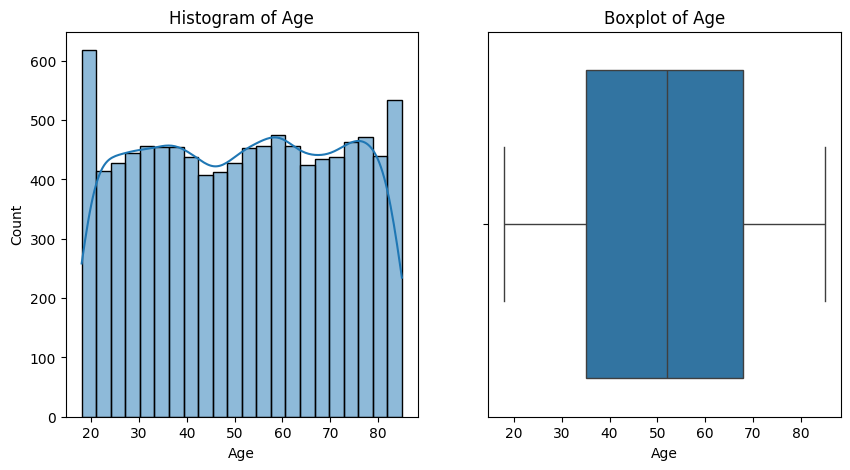

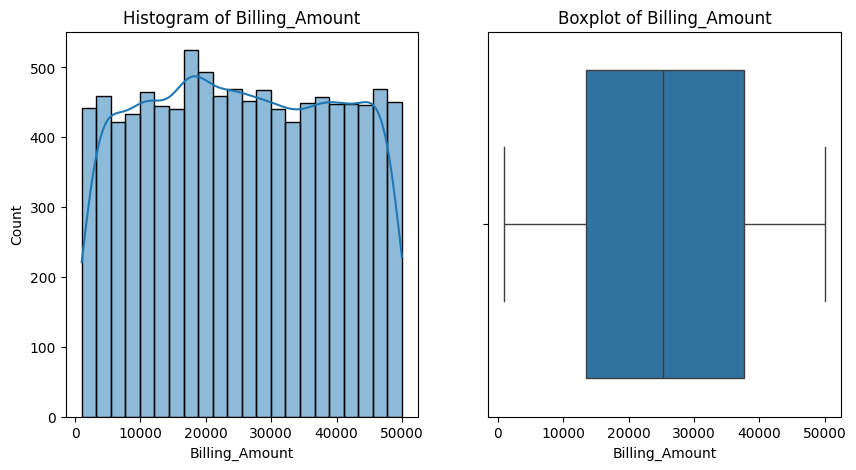

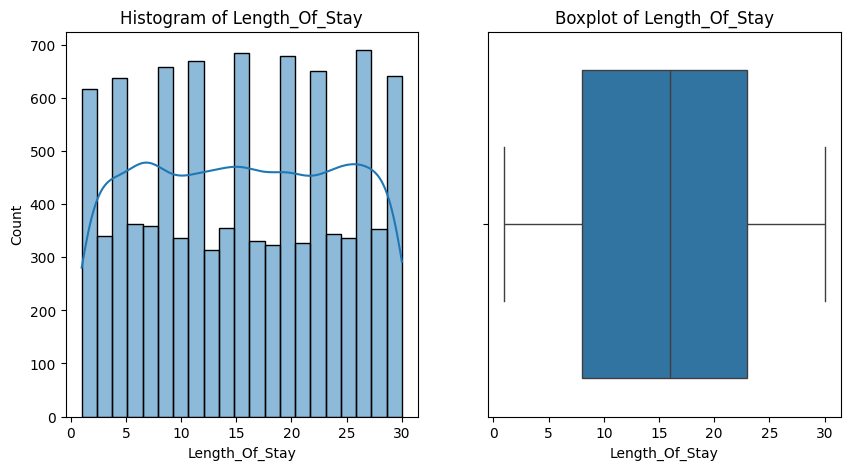

In [33]:
for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    
  # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')


In [79]:
data.describe()

,Age,Billing_Amount,Length_Of_Stay
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,15.561800
std,19.588974,14067.292709,8.612038
min,18.000000,1000.180837,1.000000
25%,35.000000,13506.523967,8.000000
50%,52.000000,25258.112565,16.000000
75%,68.000000,37733.913725,23.000000
max,85.000000,49995.902280,30.000000


 The dataset has no significant outliers

# Exploratory Data Analysis (EDA)

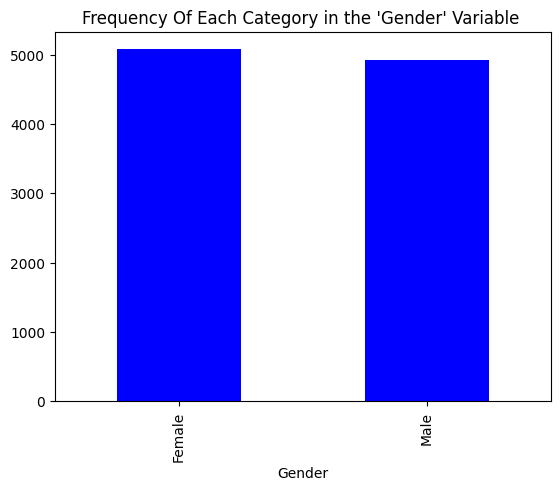

In [80]:
# VISUALIZING THE "Gender"
data['Gender'].value_counts().plot(kind='bar',color = 'blue')
plt.title("Frequency Of Each Category in the 'Gender' Variable ")
plt.show()

### Observation :
More patients are from the female category.

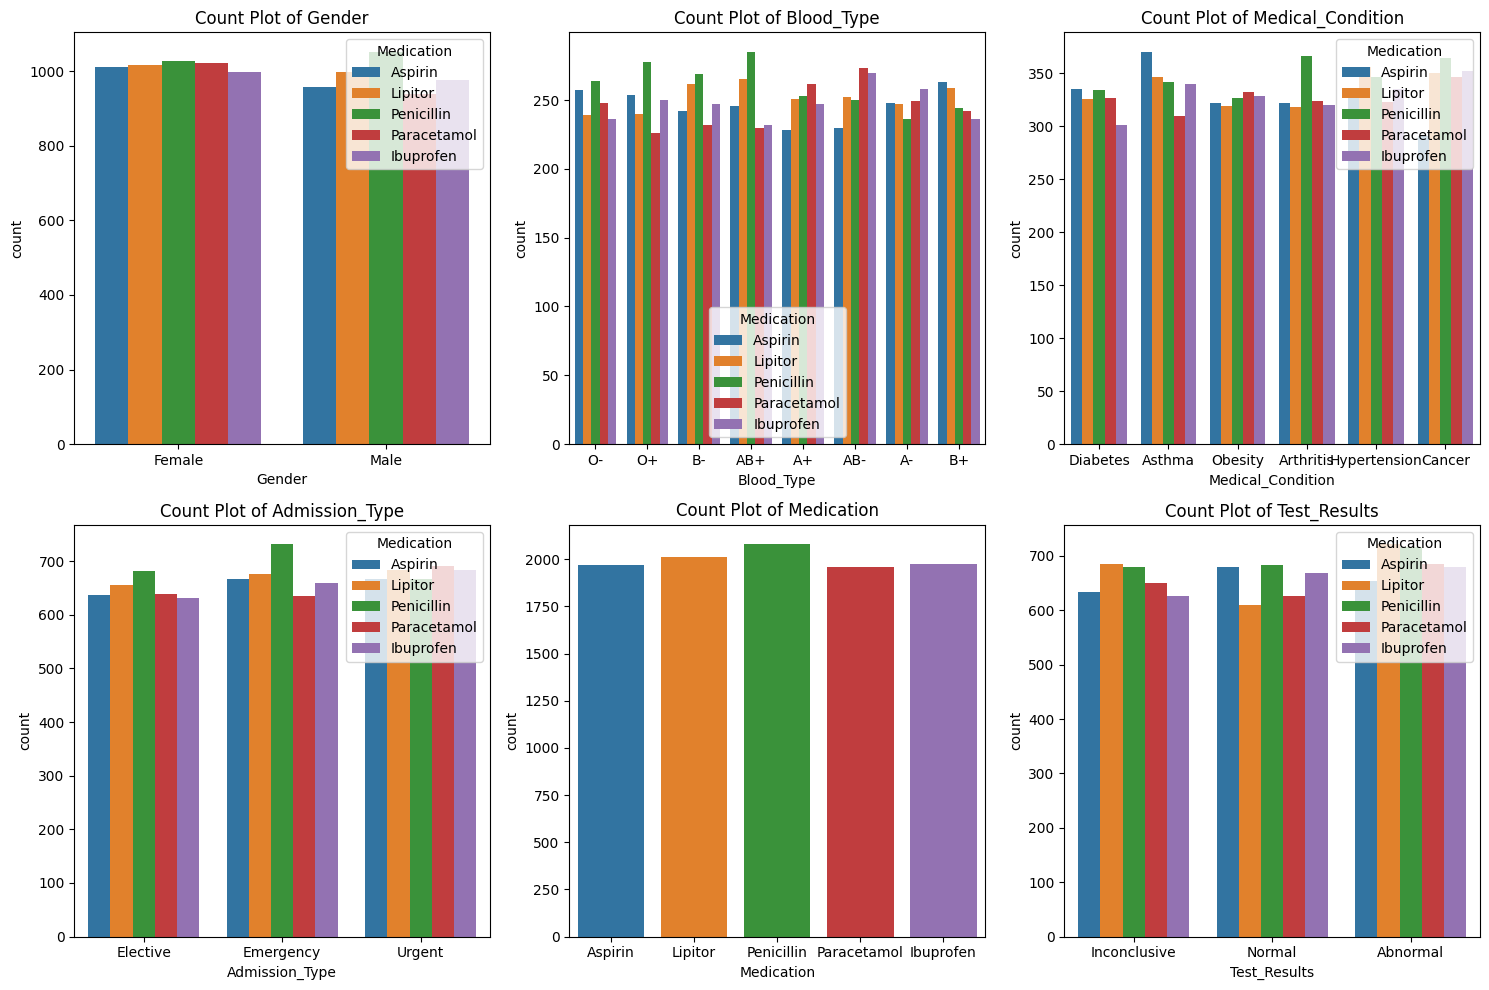

In [81]:
# List of categorical features
categorical_features = ['Gender','Blood_Type','Medical_Condition','Admission_Type','Medication','Test_Results']

# Plot count plots
plt.figure(figsize=(15, 10))

for i, feature in enumerate(categorical_features,1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, data=data, hue='Medication')
    plt.title(f'Count Plot of {feature}')

plt.tight_layout()
plt.show()


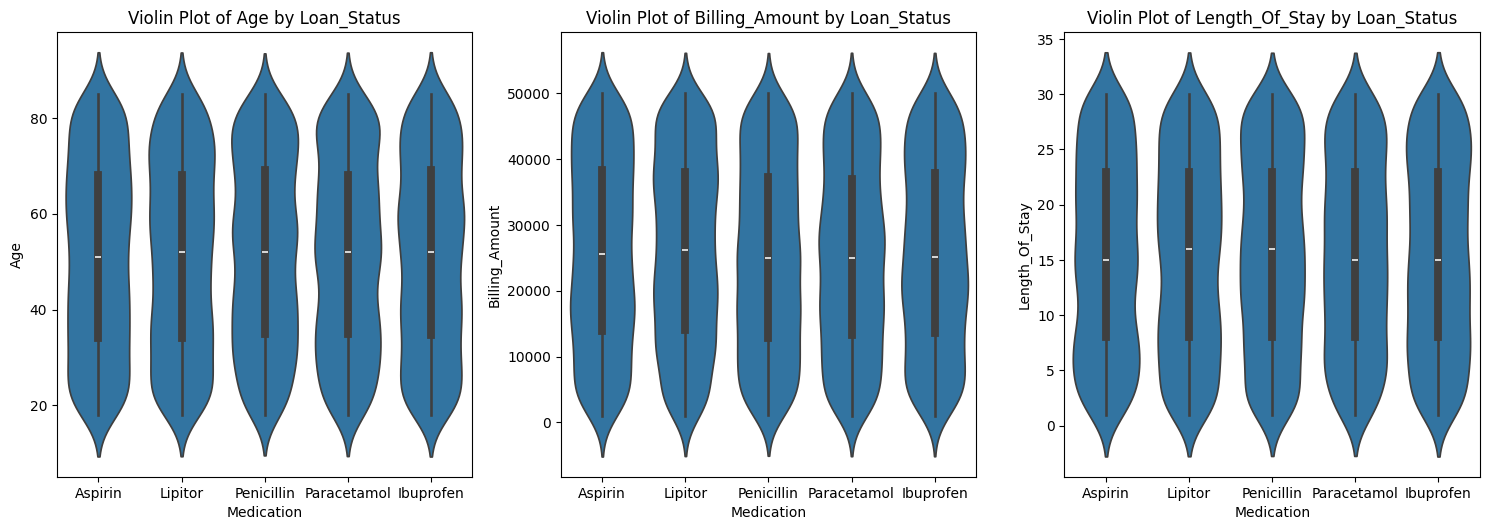

In [82]:
# Plot violin plots for numerical features vs. Medication
plt.figure(figsize=(15, 10))

for i, feature in enumerate(num_data, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x='Medication', y=feature, data=data)
    plt.title(f'Violin Plot of {feature} by Loan_Status')

plt.tight_layout()
plt.show()

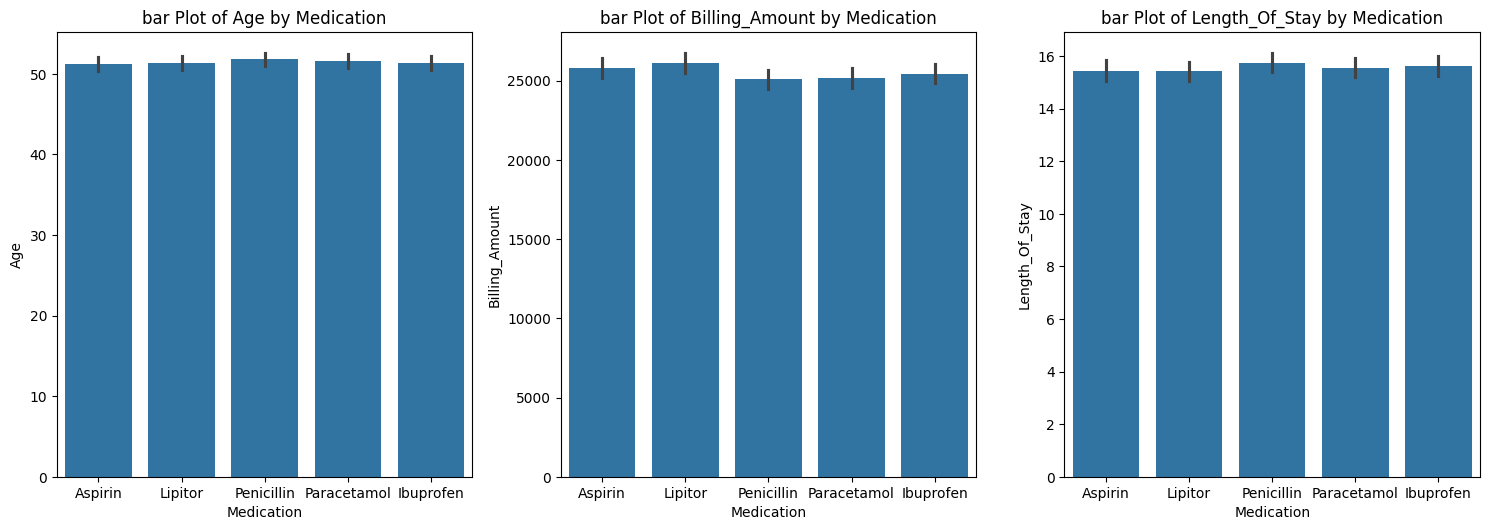

In [83]:
# Plot violin plots for numerical features vs. Medication
plt.figure(figsize=(15, 10))

for i, feature in enumerate(num_data, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x='Medication', y=feature, data=data)
    plt.title(f'bar Plot of {feature} by Medication')

plt.tight_layout()
plt.show()

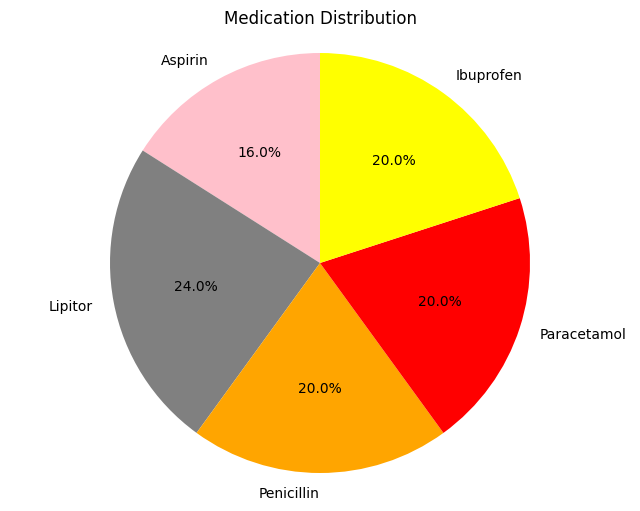

In [84]:

labels = ['Aspirin', 'Lipitor', 'Penicillin', 'Paracetamol', 'Ibuprofen']
sizes = [20, 30 ,25, 25,25]

plt.figure(figsize=(8, 6))  
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['pink', 'grey', 'orange', 'red', 'yellow'])

plt.title('Medication Distribution')
plt.axis('equal')
plt.show()



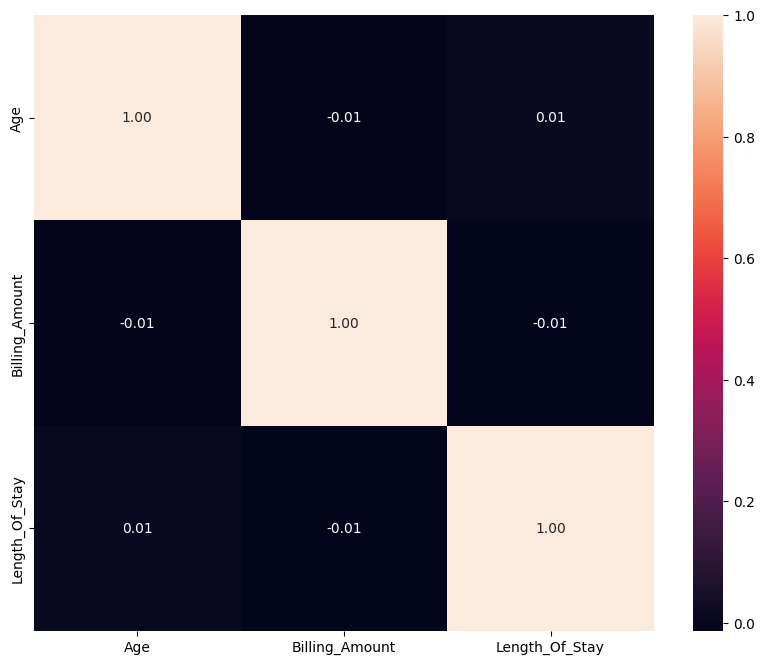

In [85]:
#correlation matrix
corr=num_data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, fmt='.2f', annot=True);
plt.show()

# Feature Engineering

In [86]:
x=data.drop("Medication",axis=1)
y=data["Medication"]

In [87]:
x

,Age,Gender,Blood_Type,Medical_Condition,Billing_Amount,Admission_Type,Test_Results,Length_Of_Stay
0,81,Female,O-,Diabetes,37490.983360,Elective,Inconclusive,14
1,35,Male,O+,Asthma,47304.064850,Emergency,Normal,14
2,61,Male,B-,Obesity,36874.897000,Emergency,Normal,30
3,49,Male,B-,Asthma,23303.322090,Urgent,Abnormal,1
4,51,Male,O-,Arthritis,18086.344180,Urgent,Normal,24
...,...,...,...,...,...,...,...,...
9995,83,Male,A+,Obesity,39606.840080,Elective,Abnormal,4
9996,47,Female,AB+,Arthritis,5995.717488,Emergency,Normal,23
9997,54,Male,B-,Arthritis,49559.202900,Elective,Normal,14
9998,84,Male,A+,Arthritis,25236.344760,Urgent,Normal,20


In [41]:
y

0           Aspirin
1           Lipitor
2           Lipitor
3        Penicillin
4       Paracetamol
           ...     
9995      Ibuprofen
9996      Ibuprofen
9997      Ibuprofen
9998     Penicillin
9999     Penicillin
Name: Medication, Length: 10000, dtype: object

In [88]:
data_1=x.select_dtypes(include="object")
data_1

,Gender,Blood_Type,Medical_Condition,Admission_Type,Test_Results
0,Female,O-,Diabetes,Elective,Inconclusive
1,Male,O+,Asthma,Emergency,Normal
2,Male,B-,Obesity,Emergency,Normal
3,Male,B-,Asthma,Urgent,Abnormal
4,Male,O-,Arthritis,Urgent,Normal
...,...,...,...,...,...
9995,Male,A+,Obesity,Elective,Abnormal
9996,Female,AB+,Arthritis,Emergency,Normal
9997,Male,B-,Arthritis,Elective,Normal
9998,Male,A+,Arthritis,Urgent,Normal


In [89]:
cat_cleaned_data_columns=list(data_1)
cat_cleaned_data_columns

['Gender', 'Blood_Type', 'Medical_Condition', 'Admission_Type', 'Test_Results']

## One-Hot Encoding

In [90]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

# Fit and transform the specified categorical columns
encoded_data = enc.fit_transform(x[cat_cleaned_data_columns]).toarray()

encoded_data

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [91]:
# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=enc.get_feature_names_out(cat_cleaned_data_columns))

# Combine the encoded DataFrame with the original cleaned_data (excluding the original categorical columns)
x = pd.concat([x.drop(columns=cat_cleaned_data_columns).reset_index(drop=True), encoded_df], axis=1)

# Display the first few rows of the encoded DataFrame
x

,Age,Billing_Amount,Length_Of_Stay,Gender_Female,Gender_Male,Blood_Type_A+,Blood_Type_A-,Blood_Type_AB+,Blood_Type_AB-,Blood_Type_B+,...,Medical_Condition_Cancer,Medical_Condition_Diabetes,Medical_Condition_Hypertension,Medical_Condition_Obesity,Admission_Type_Elective,Admission_Type_Emergency,Admission_Type_Urgent,Test_Results_Abnormal,Test_Results_Inconclusive,Test_Results_Normal
0,81,37490.983360,14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,35,47304.064850,14,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,61,36874.897000,30,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,49,23303.322090,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,51,18086.344180,24,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,83,39606.840080,4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
9996,47,5995.717488,23,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9997,54,49559.202900,14,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9998,84,25236.344760,20,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [94]:
x.shape

(10000, 25)

In [96]:
x.columns

Index(['Age', 'Billing_Amount', 'Length_Of_Stay', 'Gender_Female',
       'Gender_Male', 'Blood_Type_A+', 'Blood_Type_A-', 'Blood_Type_AB+',
       'Blood_Type_AB-', 'Blood_Type_B+', 'Blood_Type_B-', 'Blood_Type_O+',
       'Blood_Type_O-', 'Medical_Condition_Arthritis',
       'Medical_Condition_Asthma', 'Medical_Condition_Cancer',
       'Medical_Condition_Diabetes', 'Medical_Condition_Hypertension',
       'Medical_Condition_Obesity', 'Admission_Type_Elective',
       'Admission_Type_Emergency', 'Admission_Type_Urgent',
       'Test_Results_Abnormal', 'Test_Results_Inconclusive',
       'Test_Results_Normal'],
      dtype='object')

# Feature Selection

In [95]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Assume X is your feature set and y is your target variable
# Create a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(x, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                           Feature  Importance
1                   Billing_Amount    0.226495
0                              Age    0.206571
2                   Length_Of_Stay    0.181125
19         Admission_Type_Elective    0.020851
21           Admission_Type_Urgent    0.019732
22           Test_Results_Abnormal    0.019591
20        Admission_Type_Emergency    0.019519
23       Test_Results_Inconclusive    0.019459
3                    Gender_Female    0.018949
4                      Gender_Male    0.018837
24             Test_Results_Normal    0.018202
17  Medical_Condition_Hypertension    0.017522
18       Medical_Condition_Obesity    0.017453
13     Medical_Condition_Arthritis    0.017432
16      Medical_Condition_Diabetes    0.017183
10                   Blood_Type_B-    0.016938
12                   Blood_Type_O-    0.016814
5                    Blood_Type_A+    0.016548
7                   Blood_Type_AB+    0.016535
14        Medical_Condition_Asthma    0.016347
11           